In [16]:
import os, sys
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
from dcdfg.utils.dag_optim import is_acyclic
from dcdfg.utils.metrics import shd_metric as shd

## Utils

In [2]:
def load(path, verbose=False):
    dirs = sorted(glob('out/' + path + '*'))
    if verbose: print(dirs)
    data = {}
    for d in dirs:
        files = sorted(glob(d + '/*'))
        if verbose: print(files)
        subdata = {}
        for f in files:
            subdata[f.split('/')[-1].split('.')[0]] = np.load(f)
        data[d] = subdata
    return data
    
def gather_all(data, identifier):
    all_data, names = [], []
    for k in data:
        subdata = data[k]
        for dtype in subdata:
            if dtype == identifier:
                all_data.append(subdata[dtype])
                names.append(k.split('/')[-1])
    return all_data, names

def get_possible_keys(data):
    keys = {}
    for k in data:
        subdata = data[k]
        for dtype in subdata:
            if dtype not in keys:
                keys[dtype] = 0
            keys[dtype] += 1
    return keys

def get_n_edges(mat):
    return np.count_nonzero(mat) # these are directed, so can go both ways

## Perturb-seq data

### Control

In [3]:
path = 'pseq-control'
data = load(path)
get_possible_keys(data)

{'W': 2,
 'adj_mat_vars': 6,
 'U': 4,
 'V': 4,
 'adj_mat_factors_weighted': 4,
 'adj_mat_vars_weighted': 4}

In [19]:
adj_list, names = gather_all(data, 'adj_mat_vars')
# names = ['_'.join(n.split('_')[1:3]) for n in names]
for i in range(len(names)):
    temp = ""
    if 'linear_' in names[i]:
        temp += 'NOTEARS_'
    elif 'linearlr' in names[i]:
        temp += 'NOTEARS-LR_'
    elif 'mlplr' in names[i]:
        temp += 'DCDFG-LR_'
    if 'c-exp' in names[i]:
        temp += 'DAG'
    else: # 'c-none'
        temp += 'CYC'
    names[i] = temp
for adj, n in zip(adj_list, names):
    print(f"{n}: {get_n_edges(adj)} edges, {is_acyclic(adj)} acyclic")

NOTEARS_DAG: 105 edges, True acyclic
NOTEARS_CYC: 46 edges, True acyclic
NOTEARS-LR_DAG: 546 edges, True acyclic
NOTEARS-LR_CYC: 314 edges, True acyclic
DCDFG-LR_DAG: 8629 edges, True acyclic
DCDFG-LR_CYC: 121 edges, True acyclic


Observation: here, without constraint we generally have fewer edges. All graphs are acyclic though.

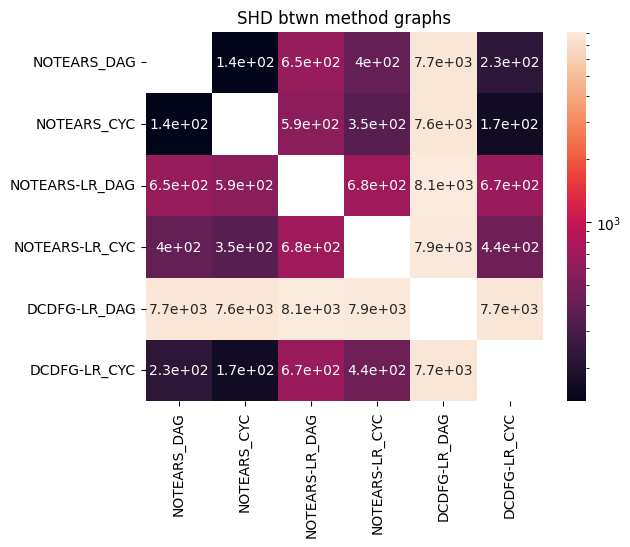

In [21]:
# make pair comparison
shd_arr = np.zeros((len(adj_list), len(adj_list)))
for i, adj1 in enumerate(adj_list):
    for j, adj2 in enumerate(adj_list):
        shd_arr[i, j] = shd(adj1, adj2)
sns.heatmap(shd_arr, annot=True, xticklabels=names, yticklabels=names, norm=LogNorm())
plt.title('SHD btwn method graphs')
plt.show()

In [27]:
adj_list, names = gather_all(data, 'adj_mat_vars_weighted')
# names = ['_'.join(n.split('_')[1:3]) for n in names]
for i in range(len(names)):
    temp = ""
    if 'linear_' in names[i]:
        temp += 'NOTEARS_'
    elif 'linearlr' in names[i]:
        temp += 'NOTEARS-LR_'
    elif 'mlplr' in names[i]:
        temp += 'DCDFG-LR_'
    if 'c-exp' in names[i]:
        temp += 'DAG'
    else: # 'c-none'
        temp += 'CYC'
    names[i] = temp
for adj, n in zip(adj_list, names):
    print(f"{n}: {get_n_edges(adj)} edges, {is_acyclic(adj)} acyclic")

NOTEARS-LR_DAG: 546 edges, True acyclic
NOTEARS-LR_CYC: 314 edges, True acyclic
DCDFG-LR_DAG: 922560 edges, False acyclic
DCDFG-LR_CYC: 922560 edges, False acyclic


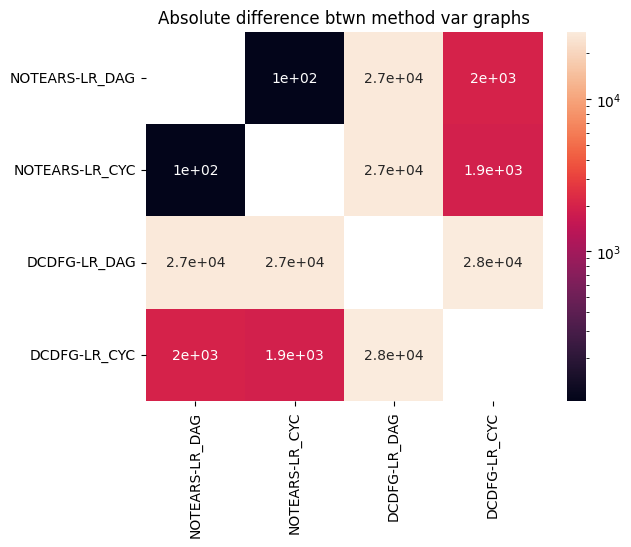

In [28]:
# compare factor graphs too somehow?
# make pair comparison
shd_arr = np.zeros((len(adj_list), len(adj_list)))
for i, adj1 in enumerate(adj_list):
    for j, adj2 in enumerate(adj_list):
        shd_arr[i, j] = (np.abs(adj1 - adj2)).sum()
sns.heatmap(shd_arr, annot=True, xticklabels=names, yticklabels=names, norm=LogNorm())
plt.title('Absolute difference btwn method var graphs')
plt.show()

In [ ]:
adj_list, names = gather_all(data, 'adj_mat_factors_weighted')
# names = ['_'.join(n.split('_')[1:3]) for n in names]
for i in range(len(names)):
    temp = ""
    if 'linear_' in names[i]:
        temp += 'NOTEARS_'
    elif 'linearlr' in names[i]:
        temp += 'NOTEARS-LR_'
    elif 'mlplr' in names[i]:
        temp += 'DCDFG-LR_'
    if 'c-exp' in names[i]:
        temp += 'DAG'
    else: # 'c-none'
        temp += 'CYC'
    names[i] = temp
for adj, n in zip(adj_list, names):
    print(f"{n}: {get_n_edges(adj)} edges, {is_acyclic(adj)} acyclic")

NOTEARS-LR_DAG: 400 edges, False acyclic
NOTEARS-LR_CYC: 400 edges, False acyclic
DCDFG-LR_DAG: 380 edges, False acyclic
DCDFG-LR_CYC: 380 edges, False acyclic


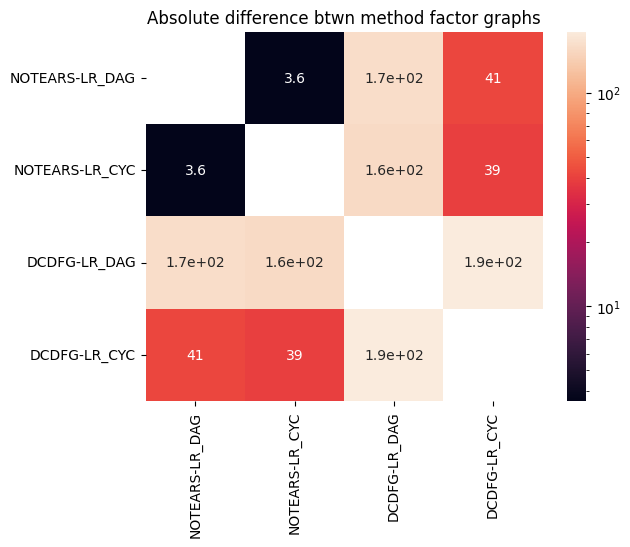

In [ ]:
# compare factor graphs too somehow?
# make pair comparison
shd_arr = np.zeros((len(adj_list), len(adj_list)))
for i, adj1 in enumerate(adj_list):
    for j, adj2 in enumerate(adj_list):
        shd_arr[i, j] = (np.abs(adj1 - adj2)).sum()
sns.heatmap(shd_arr, annot=True, xticklabels=names, yticklabels=names, norm=LogNorm())
plt.title('Absolute difference btwn method factor graphs')
plt.show()

In [25]:
adj_list_U, names = gather_all(data, 'U')
adj_list_V, names = gather_all(data, 'V')
# names = ['_'.join(n.split('_')[1:3]) for n in names]
for i in range(len(names)):
    temp = ""
    if 'linear_' in names[i]:
        temp += 'NOTEARS_'
    elif 'linearlr' in names[i]:
        temp += 'NOTEARS-LR_'
    elif 'mlplr' in names[i]:
        temp += 'DCDFG-LR_'
    if 'c-exp' in names[i]:
        temp += 'DAG'
    else: # 'c-none'
        temp += 'CYC'
    names[i] = temp
# for adj, n in zip(adj_list, names):
#     print(f"{n}: {get_n_edges(adj)} edges, {is_acyclic(adj)} acyclic")

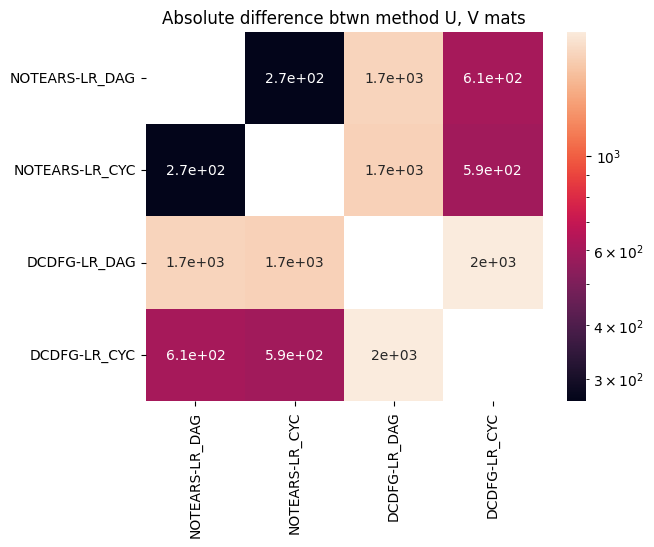

In [26]:
# compare factor graphs too somehow?
# make pair comparison
shd_arr = np.zeros((len(adj_list), len(adj_list)))
for i, (adju1, adjv1) in enumerate(zip(adj_list_U, adj_list_V)):
    for j, (adju2, adjv2) in enumerate(zip(adj_list_U, adj_list_V)):
        shd_arr[i, j] = (np.abs(adju1 - adju2)).sum() + (np.abs(adjv1 - adjv2)).sum()
sns.heatmap(shd_arr, annot=True, xticklabels=names, yticklabels=names, norm=LogNorm())
plt.title('Absolute difference btwn method U, V mats')
plt.show()

pseq-control_m-linearlr_c-exp_f-20_l-0.001_r-0.1


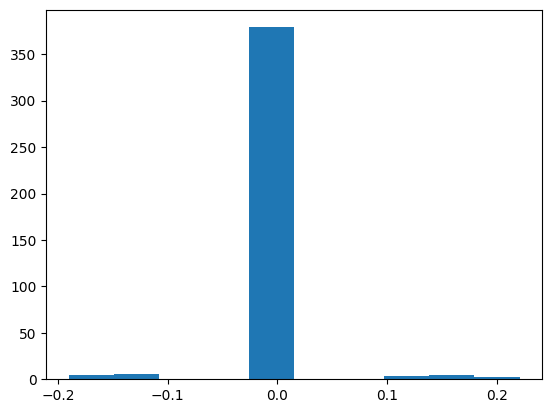

pseq-control_m-linearlr_c-none_f-20_l-0.001_r-0.1


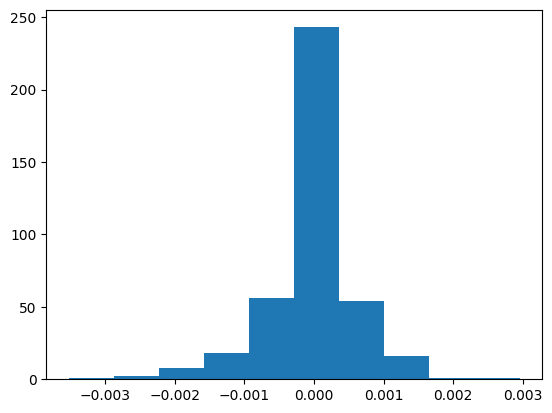

pseq-control_m-mlplr_c-exp_f-20_l-0.001_r-0.1


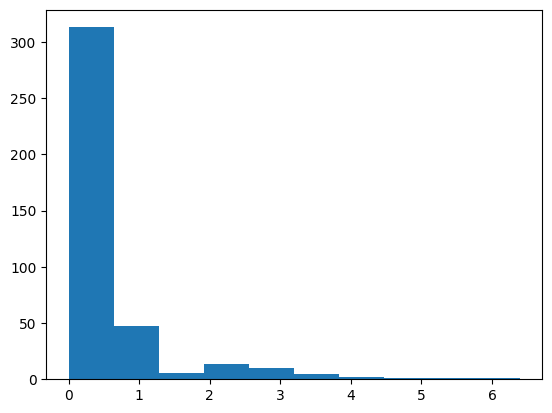

pseq-control_m-mlplr_c-none_f-20_l-0.001_r-0.1


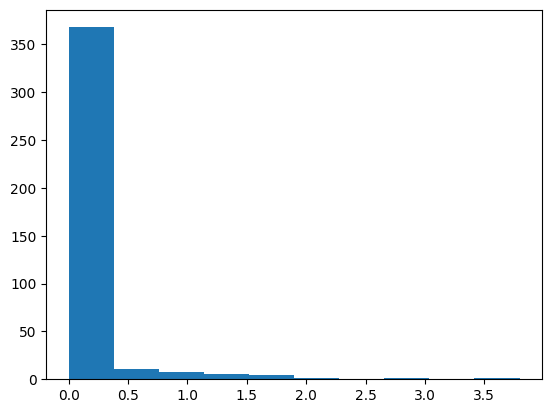

In [29]:
adj_list, names = gather_all(data, 'adj_mat_factors_weighted')
for adj, n in zip(adj_list, names):
    print(n); plt.hist(adj.ravel()); plt.show()
    # break
    # print(f"{n}: {get_n_edges(adj)} edges, {is_acyclic(adj)} acyclic")

### Cocult

In [30]:
path = 'pseq-cocult'
data = load(path)
get_possible_keys(data)

{'W': 2,
 'adj_mat_vars': 6,
 'U': 4,
 'V': 4,
 'adj_mat_factors_weighted': 4,
 'adj_mat_vars_weighted': 4}

In [31]:
adj_list, names = gather_all(data, 'adj_mat_vars')
for adj, n in zip(adj_list, names):
    print(f"{n}: {get_n_edges(adj)} edges, {is_acyclic(adj)} acyclic")

pseq-cocult_m-linear_c-exp_f-20_l-0.001_r-0.1: 9 edges, True acyclic
pseq-cocult_m-linear_c-none_f-20_l-0.001_r-0.1: 3 edges, True acyclic
pseq-cocult_m-linearlr_c-exp_f-20_l-0.001_r-0.1: 28 edges, True acyclic
pseq-cocult_m-linearlr_c-none_f-20_l-0.001_r-0.1: 24 edges, True acyclic
pseq-cocult_m-mlplr_c-exp_f-20_l-0.001_r-0.1: 15746 edges, True acyclic
pseq-cocult_m-mlplr_c-none_f-20_l-0.001_r-0.1: 151 edges, True acyclic


### Ifn

In [32]:
path = 'pseq-ifn'
data = load(path)
get_possible_keys(data)

{'W': 2,
 'adj_mat_vars': 6,
 'U': 4,
 'V': 4,
 'adj_mat_factors_weighted': 4,
 'adj_mat_vars_weighted': 4}

In [33]:
adj_list, names = gather_all(data, 'adj_mat_vars')
for adj, n in zip(adj_list, names):
    print(f"{n}: {get_n_edges(adj)} edges, {is_acyclic(adj)} acyclic")

pseq-ifn_m-linear_c-exp_f-20_l-0.001_r-0.1: 3 edges, True acyclic
pseq-ifn_m-linear_c-none_f-20_l-0.001_r-0.1: 1 edges, True acyclic
pseq-ifn_m-linearlr_c-exp_f-20_l-0.001_r-0.1: 293 edges, True acyclic
pseq-ifn_m-linearlr_c-none_f-20_l-0.001_r-0.1: 55 edges, True acyclic
pseq-ifn_m-mlplr_c-exp_f-20_l-0.001_r-0.1: 14263 edges, True acyclic
pseq-ifn_m-mlplr_c-none_f-20_l-0.001_r-0.1: 409 edges, True acyclic


## Gaussian synthetic data